In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from bokeh.io import output_notebook, show
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import ColumnDataSource, CheckboxButtonGroup, CustomJS, HoverTool
from bokeh.layouts import column
from bokeh.palettes import Spectral5
from sklearn.linear_model import LinearRegression
from bokeh.palettes import Colorblind5
from bokeh.layouts import gridplot
from bokeh.models import ColumnDataSource, Span, Legend, LegendItem
from bokeh.plotting import figure, show, output_notebook
from bokeh.palettes import Category20, Category20b, Category20c
from math import pi
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Table of Contents
* [1. Motivation](#chapter1)
* [2. Basic stats](#chapter2)
* [3. Data Analysis](#chapter3)
* [4. Genre](#chapter4)
* [5. Visualizations](#chapter5)
    * [5.1 Current Sales/Trends with Electric Vehicles Worldwide](#section_3_1)
        * [5.1.1 Market Growth](#sub_section_3_1_1)
        * [5.1.2 Fully-electric cars vs. plug-in hybrids](#sub_section_3_1_1)
        * [5.1.3 Top Manufacturers](#sub_section_3_1_1)
    * [5.2 ML - Random Forest](#section_3_1)
    * [5.3 Case Study - Palo Alto](#section_3_2)
* [6. Discussion](#chapter6)
* [7. Contributions](#chapter7)

## 1. Motivation

## 2. Basic Stats

## 3. Data Analysis

## 4. Genre

## 5. Visualizations

## 5.1 Current Sales/Trends with Electric Vehicles Worldwide
Electric vehicle sales are on the rise globally, as more people is deciding to switch to "greener" forms of transportation. This trend is driven by a growing awareness of environmental issues and a shared interest in eco-friendly technology. It is clear that both the hype around and the actual move toward electric mobility are accelerating, reflecting a collective effort to tackle climate change.

### 5.1.1 Market Growth:

- Sales of electric cars started from a low base but are growing quickly in many markets.
- Globally, around 1-in-4 new cars sold were electric in 2023. In **Norway**, this share was over 90%, and in **China**, it was almost 40%.
- In the following visualization, “electric cars” include fully battery-electric vehicles and plug-in hybrids.

The dataset is about a share of new cars sold that are electric for 13 years period (2010-2023), in other words, how many of total cars sold within a year were EVs. In the following section, USA (where Palo Alto is located) will be compared to Denmark, EU, Noraway and China. 

[1] https://www.iea.org/reports/global-ev-outlook-2023

In [60]:
data=pd.read_csv('data/electric-car-sales-share.csv')

In [61]:
required_countries = ["United States", "European Union (27)", "China", "Denmark", "Norway","World"]
required_countries_data = data[data['Entity'].isin(required_countries)]

output_notebook()
source = ColumnDataSource(required_countries_data)

#Bokeh figure
p = figure(title="Electric Car Sales Share Comparison",
           x_axis_label='Year', y_axis_label='Electric Cars Sales Share (%)')

#each country's data with a unique color
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
] 
renderers = {}
for i, country in enumerate(required_countries):
    country_data = required_countries_data[required_countries_data['Entity'] == country]
    cds = ColumnDataSource(country_data)
    renderers[country] = p.line(x='Year', y='Share of new cars that are electric', 
                                source=cds, color=colors[i % len(colors)], 
                                line_width=2, legend_label=country)

p.legend.click_policy = "hide"
p.legend.location = 'top_left'
#CheckboxButtonGroup with all countries selected by default
checkbox_button_group = CheckboxButtonGroup(labels=required_countries, 
                                            active=list(range(len(required_countries))))

#JavaScript callback to show/hide lines
callback = CustomJS(args=dict(renderers=renderers), code="""
    for (var country in renderers) {
        renderers[country].visible = false;
    }
    for (var i of cb_obj.active) {
        var country = cb_obj.labels[i];
        renderers[country].visible = true;
    }
""")
checkbox_button_group.js_on_change('active', callback)
layout = column(checkbox_button_group, p)
show(layout)

Loading BokehJS ...

In [4]:
output_notebook()
p = figure(title="Electric Car Sales Share Comparison", x_axis_label='Year', y_axis_label='Electric Cars Sales Share (%)')

colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
] 
legend_items = []

for i, country in enumerate(required_countries):
    country_data = data[data['Entity'] == country]
    country_data = country_data.sort_values('Year')
    
    X = country_data['Year'][:-1].values.reshape(-1, 1)  # Exclude the last year for prediction
    y = country_data['Share of new cars that are electric'][:-1]
    reg = LinearRegression().fit(X, y)
    #predict the next year's value based on the model
    predicted_value = reg.predict([[country_data['Year'].values[-1] + 1]])
    #test
    line = p.line(x='Year', y='Share of new cars that are electric', source=ColumnDataSource(country_data), color=colors[i], line_width=2, legend_label=country)
    #predicted
    pred_line = p.line(x=[country_data['Year'].values[-1], country_data['Year'].values[-1] + 1], 
                       y=[country_data['Share of new cars that are electric'].values[-1], predicted_value[0]], 
                       color=colors[i], line_width=2, line_dash='dashed', legend_label=country)
    
    legend_items.append((country, [line, pred_line]))

p.legend.click_policy = "hide"
p.legend.location = 'top_left'
p.add_layout(Span(location=country_data['Year'].values[-1], dimension='height', line_dash='dashed', line_color='gray'))
show(p)

Loading BokehJS ...

NameError: name 'data' is not defined

From the plot above it can be observed that Norway has the highest share of new cars that are electric by far, compared to other states. Such a result is expected, since Norway is also known for its very generous subsidy for EVs, as explained here https://alternative-fuels-observatory.ec.europa.eu/transport-mode/road/norway/incentives-legislations. Surprisingly, the USA is below the world's average, mostly due to the cheaper gas prices compared to other countries. Interestingly, China surpassed the EU in 2018 but still remained on lower sales than Denmark, which has the highest share of new cars that are electric within the EU.

### 5.1.2 Fully-electric cars vs. plug-in hybrids:

“Electric cars” include battery-electric and plug-in hybrid vehicles. The difference is that fully battery-electric cars do not have an internal combustion engine, whereas plug-in hybrids have a rechargeable battery and electric motor and an internal combustion engine that runs on gasoline.

- Plug-in hybrid could be driven as a standard petrol car if the owner did not charge the battery. 

- The battery in plug-in hybrids is smaller and has a shorter range than battery-electric cars, so over longer distances, the car starts running on gasoline once the battery has run out.

- Since plug-in hybrids will often run on petrol, they tend to emit more carbon than battery-electric cars. However, they do usually have lower emissions than petrol or diesel cars.

In the barcharts below we will compare the share of Battery-electric and Plug-in hybrid cars sold across different states and worldwide.

[2] https://www.iea.org/reports/global-ev-outlook-2023

In [5]:
car_sales_data = pd.read_csv('share-car-sales-battery-plugin.csv')
#Grouping data by 'Year' and 'Entity'
car_sales_grouped = car_sales_data.groupby(['Entity', 'Year']).sum().reset_index()
countries = ["United States", "China", "European Union (27)", "Denmark", "Norway","World"]
output_notebook()

#list to hold the individual plots
plots = []

lighter_blue = "#6baed6"
lighter_red = "#fb6a4a"
colors = Colorblind5[:2]

#plot for each country
for i, country in enumerate(countries):
    # Filter the data for the country
    country_sales = car_sales_grouped[car_sales_grouped['Entity'] == country]
    source = ColumnDataSource(country_sales)
    
    #figure with a title and axis labels
    p = figure(title=f"Share of New Cars Sold in {country} that are Battery-Electric and Plug-in Hybrid",
               x_axis_label='Year', y_axis_label='Share of Cars Sold (%)',
               height=450, width=600, tools="")

    #Stack the bars for 'Battery-electric' and 'Plug-in hybrid'
    p.vbar_stack(['Battery-electric as a share of cars sold', 'Plug-in hybrid as a share of cars sold'],
                 x='Year', width=0.9, color=colors, source=source,
                 legend_label=['Battery-electric', 'Plug-in hybrid'])

    p.xaxis.major_label_orientation = 1.57 / 4
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"
    plots.append(p)

#grid layout of plots
grid = gridplot(plots, ncols=2)
show(grid)

FileNotFoundError: [Errno 2] No such file or directory: 'share-car-sales-battery-plugin.csv'

It can be observed that Norway and Denmark are the only ones from above which have decline of share of Plug-in hybrid cars sold in the last year. In all of the displayed bar plots, the exponential growth of Battery-electric EVs is observed. That implies growing awareness of environmental issues and a shared interest in eco-friendly technology, together with the partial transition towards fully electric cars by a large share of the population represented by Plug-in hybrid sales. Transition to fully electric cars has yet not been established due concernc about vehicle range, and many opt for hybrids or gasoline-fueled vehicles to travel longer distances.

### 5.1.3 Top Manufacturers:

Sales of plug-in electric vehicles (PEVs) grew rapidly from 2011 to 2018. Technology improvements, cost reduction, increasing model choice, maturing charging infrastructure, and economic recovery have continued to influence and support increased sales. Until 2018, the Chevrolet Volt had been on the market the longest and had the most overall sales, but the model was discontinued in 2019. In 2018, the newly introduced Tesla Model 3 rapidly increased vehicle sales and established the vehicle as the best-selling plug-in electric vehicle with nearly 50% of the market share. In the plot below, the top 10 EV manafacturers by total sales for period from 2012-2019 will be displayed.

[3] https://www.anl.gov/esia/light-duty-electric-drive-vehicles-monthly-sales-updates

In [82]:
sales_data = pd.read_csv('data/Electric Car Sales by Model in USA.csv')

output_notebook()

# Make sure you have the correct dataset in 'top_makes_long' before you plot.
for year in range(2012, 2020):
    sales_data[str(year)] = pd.to_numeric(sales_data[str(year)].astype(str).str.replace(',', ''), errors='coerce')

# Group by 'Make' and sum the sales for each year, summing only numeric columns
sales_by_make = sales_data.groupby('Make').sum(min_count=1)

# Now, calculate the 'Total_Sales' for each 'Make' by summing across the numeric year columns only
sales_by_make['Total_Sales'] = sales_by_make[[str(year) for year in range(2012, 2020)]].sum(axis=1)

# Get the top 10 makes by total sales
top_makes = sales_by_make['Total_Sales'].nlargest(10).index.tolist()
top_makes_sales = sales_by_make.loc[top_makes].reset_index()

# Melt the DataFrame to long format for plotting
top_makes_long = pd.melt(top_makes_sales, id_vars=['Make'], var_name='Year', value_name='Sales')


# Convert 'Year' to string for categorical data plotting
top_makes_long['Year'] = top_makes_long['Year'].astype(str)

# Make sure the years are sorted
years_sorted = sorted(top_makes_long['Year'].unique())
years_sorted = [str(year) for year in range(2012, 2020)]

# Create a color map from makes to colors
makes = top_makes_long['Make'].unique().tolist()
colors = Category20[len(makes)] if len(makes) <= 20 else Category20[20] + Category20[len(makes)-20]
make_color = {make: color for make, color in zip(makes, colors)}
# Create a color map from makes to colors
makes = top_makes_long['Make'].unique().tolist()
colors = Category20[len(makes)] if len(makes) <= 20 else Category20[20] + Category20[len(makes) - 20]
make_color = {make: color for make, color in zip(makes, colors)}

output_notebook()
source = ColumnDataSource(top_makes_long)

p = figure(x_range=years_sorted, title="Total Car Sales by Make and Year (Top 10)",
           x_axis_label='Year', y_axis_label='Total Sales', sizing_mode="stretch_width", height=600)

#lines for each make with a unique color
for make in makes:
    make_data = top_makes_long[(top_makes_long['Make'] == make) & (top_makes_long['Year'].isin(years_sorted))]
    make_source = ColumnDataSource(make_data)
    p.line(x='Year', y='Sales', source=make_source, legend_label=make, color=make_color[make])
    p.circle(x='Year', y='Sales', source=make_source, legend_label=make, color=make_color[make], size=8)

p.legend.click_policy = "hide"
p.legend.title = 'Make'
hover = HoverTool()
hover.tooltips = [("Make", "@Make"), ("Sales", "@Sales{0,0}"), ("Year", "@Year")]
p.add_tools(hover)
p.xaxis.major_label_orientation = pi / 4
show(p)

Loading BokehJS ...

Loading BokehJS ...

From the plot above it can be observed that all the manufacturers have increased sales through the last 10 years. Until 2017 Chevrolet had the most sales, when Tesla took the lead with further exponential growth. That reflects a (closely correlated) share of new EVs sold worldwide. 

## 5.2 ML - Random Forest

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

data = pd.read_csv('data/EVChargingStationUsage.csv')

#create lagged features
def buildLaggedFeatures(s, lag=30, dropna=True):
    """
    Assumes that 's' is a pandas Series with a datetime index.
    """
    df = pd.concat([s.shift(i) for i in range(lag + 1)], axis=1)
    df.columns = ['lag_{}'.format(i) if i != 0 else s.name for i in range(lag + 1)]
    if dropna:
        df = df.dropna()
    return df

#Convert to datetime
data['Start DateTime'] = pd.to_datetime(data['Start Date'] + ' ' + data['Start Time Zone'], errors='coerce')
data.dropna(subset=['Start DateTime'], inplace=True)

#Group by date and sum the 'Energy (kWh)' for each day across all stations
daily_energy = data.groupby(data['Start DateTime'].dt.floor('D'))['Energy (kWh)'].sum()

cutoff_days = 10  
lagged_features = buildLaggedFeatures(daily_energy, lag=30)
train_data = lagged_features.iloc[:-30-cutoff_days]  #Exclude the last 30 days plus cutoff_days for training
test_data = lagged_features.iloc[-30-cutoff_days:-cutoff_days]  #Test data excludes the cutoff at the end as well

#model training and predictions
X_train = train_data.drop(columns=['Energy (kWh)'])
y_train = train_data['Energy (kWh)']
X_test = test_data.drop(columns=['Energy (kWh)'])
y_test = test_data['Energy (kWh)']
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

#Prediction and RMSE calculation
y_pred = rf_regressor.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE for All Stations: {rmse}')

data = {'date': y_test.index,
        'actual': y_test,
        'forecasted': y_pred}
source = ColumnDataSource(data)

p = figure(width=1000, height=600, x_axis_type='datetime', title='Daily Energy Consumption for All Stations - 30 Days Forecast')
p.line(x='date', y='actual', line_width=2, color="#6baed6", legend_label='Actual', source=source)
p.line(x='date', y='forecasted', line_width=2, color="#fb6a4a", legend_label='Forecasted', source=source)
p.add_tools(HoverTool(tooltips=[("Date", "@date{%F}"), 
                                ("Actual", "@actual{0.2f} kWh"), 
                                ("Forecasted", "@forecasted{0.2f} kWh")],
                     formatters={'@date': 'datetime'}, mode='vline'))
p.legend.location = 'top_left'
p.legend.click_policy = "hide"
p.xaxis.axis_label = "Date"
p.yaxis.axis_label = "Energy (kWh)"
p.xaxis.formatter.days = '%Y-%m-%d'
show(p)

RMSE for All Stations: 128.9409593573127


## 5.3 Case Study - Palo Alto

In [33]:
import seaborn as sns


Palo Alto is located in the center of Silicon Valley, and has one of the highest EV adoption rates per capita, with **2500** residents currently owning EVs and another **1,000 EV** commuters coming into town each day. The city has taken multiple actions to accelerate EV adoption [1].

### Key Factors in Palo Alto's Success:

- City and state-level incentives that lower the cost of EVs up to **80,000 $**
- Solid charging network in the city center near large employers such as **Stanford, University South, and Tesla Motors.**
- A tech-savvy population 
- "Ride and drive" events to introduce residents to EVs, with a significant percentage of participants experiencing their first EV test drive.

### Our aim for further improvements
- Create a forecasting model to understand when there is largest amount of people charging and to give a Fee estimation to the clients
- Understand EV energy spending 
- Understand electricity generation in the city to further incentivise sustainability

In [34]:
### Data loading
data_cleaned = pd.read_csv('data/data_cleaned.csv')
data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'], errors='coerce')
data_cleaned['End Date'] = pd.to_datetime(data_cleaned['End Date'], errors='coerce')
data_cleaned['Transaction Date (Pacific Time)'] = pd.to_datetime(data_cleaned['Transaction Date (Pacific Time)'], errors='coerce')
data_cleaned['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Total Duration (hh:mm:ss)'])
data_cleaned['Charging Time (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Charging Time (hh:mm:ss)'])

### 5.3.1 Charging station data analysis

In [35]:
import folium

# Find unique combinations of 'MAC Address', 'Latitude', and 'Longitude'
unique_locations = data_cleaned[['MAC Address', 'Latitude', 'Longitude']].drop_duplicates()

print("Unique EV Charging locations in the city: ", len(unique_locations))

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[data_cleaned['Latitude'].mean(), data_cleaned['Longitude'].mean()], zoom_start=13)

# Add a marker for each unique charger location
for idx, row in unique_locations.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['MAC Address']).add_to(m)

# Display the map
m

Unique EV Charging locations in the city:  64


As can be seen from the map, the charging stations are located near Stanford University in the city centre

In [94]:
from bokeh.plotting import figure, show
from bokeh.models import Span
from bokeh.io import output_notebook
import numpy as np

# Calculate the average frequency of charging per MAC Address
average_frequency = data_cleaned.groupby('MAC Address').size()

# Remove the stations with frequency < 28 -> anomalies
average_frequency = average_frequency[average_frequency > 28]

data_cleaned = data_cleaned[data_cleaned['MAC Address'].isin(average_frequency.index)]
charging_time_minutes = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Calculate the histogram data
hist, edges = np.histogram(charging_time_minutes, bins=50)

# Create a new figure
p = figure(title='Distribution of Charging Times', x_axis_label='Charging Time (minutes)', y_axis_label='Frequency', width=500, height=400)

# Add a quad glyph for the histogram
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color='blue')

# Calculate the average charging time
average_charging_time = charging_time_minutes.mean()

# Add a vertical line at the average charging time
average_line = Span(location=average_charging_time, dimension='height', line_color='red', line_dash='dashed', line_width=2)
p.add_layout(average_line)

# Display the plot
output_notebook()
show(p)

Loading BokehJS ...

As can be seen from the plot, the charging time follows a power law distribution with the average charging time of approximately 118 minutes where shorter charging times are more frequent than longer ones. After going through average charging times for electric vehicles we found out that batery charging follows a two-phase process; initially, the charging is fast, followed by a slower phase as the battery approaches full capacity. 

In [93]:
from bokeh.plotting import figure, show
from bokeh.models import Span
from bokeh.io import output_notebook

# Calculate the average frequency of charging per MAC Address
average_frequency = data_cleaned.groupby('MAC Address').size()
average_frequency = average_frequency[average_frequency > 28]

# Calculate the average frequency across all MAC Addresses
mean_frequency = average_frequency.mean()

# Create a new figure
p = figure(x_range=average_frequency.index.tolist(), title='Number of charging per charging station', 
           x_axis_label='MAC Address', y_axis_label='Average Frequency', 
           width=500, height=400)

# Create a bar chart of the average frequencies
p.vbar(x=average_frequency.index.tolist(), top=average_frequency.values, width=0.5, color='green')

# Add a horizontal line representing the average frequency across all MAC Addresses
average_line = Span(location=mean_frequency, dimension='width', line_color='red', line_dash='dashed', line_width=2)
p.add_layout(average_line)

# Rotate the x-axis labels for better readability
p.xaxis.major_label_orientation = "vertical"

# Display the plot
output_notebook()
show(p)

Loading BokehJS ...

#### Wassterstein distance - comparison between charging stations

In order to understand the difference between charging station we use Wasserstein distance, which takes into account the entire shape of the charging time distributions and not only the frequency. This is because charging times can vary significantly, and simply comparing the average might not capture the full picture. If a particular station consistently shows a higher Wasserstein distance compared to others, it indicates potential inefficiencies in its charging infrastructure.

In [38]:
import numpy as np
from scipy.stats import wasserstein_distance

# Convert 'Charging Time (hh:mm:ss)' to total number of minutes
data_cleaned['Charging Time (minutes)'] = data_cleaned['Charging Time (hh:mm:ss)'].dt.total_seconds() / 60

# Get the unique MAC Addresses
mac_addresses = data_cleaned['MAC Address'].unique()

# Create a distribution for the average charging time
average_distribution = data_cleaned['Charging Time (minutes)']

# Create a dictionary to store the values
values_dict = {}

# Loop over the unique MAC Addresses
for mac_address in mac_addresses:
    # Filter the data for the current MAC Address
    data_filtered = data_cleaned[data_cleaned['MAC Address'] == mac_address]
    
    # Calculate the average charging time
    average_charging_time = data_filtered['Charging Time (minutes)'].mean()
    
    # Calculate the Wasserstein distance between the distribution for the current MAC Address and the average distribution
    w_dist = wasserstein_distance(data_filtered['Charging Time (minutes)'], average_distribution)
    
    # Save the values into the dictionary
    values_dict[mac_address] = (average_charging_time, w_dist)

# Find the MAC Address with the most similar distribution (minimum Wasserstein distance)
most_similar_mac_address = min(values_dict, key=lambda x: values_dict[x][1])

# Find the MAC Address with the most distant distribution (maximum Wasserstein distance)
most_distant_mac_address = max(values_dict, key=lambda x: values_dict[x][1])

# Sort the dictionary by the Wasserstein distance
sorted_values = sorted(values_dict.items(), key=lambda x: x[1][1])

# Find the MAC Address with the median Wasserstein distance
median_mac_address = sorted_values[len(sorted_values) // 2][0]

# print('Median Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(median_mac_address, *values_dict[median_mac_address]))
# print('Most Similar Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(most_similar_mac_address, *values_dict[most_similar_mac_address]))
# print('Most Distant Distribution: MAC Address: {}, Average Charging Time: {:.2f} minutes, Wasserstein Distance to Average Distribution: {:.2f}'.format(most_distant_mac_address, *values_dict[most_distant_mac_address]))

In [92]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Legend, LegendItem
import numpy as np


# Filter the data for the most similar MAC Address
data_similar = data_cleaned[data_cleaned['MAC Address'] == most_similar_mac_address]

# Filter the data for the most distant MAC Address
data_distant = data_cleaned[data_cleaned['MAC Address'] == most_distant_mac_address]

# Filter the data for the median MAC Address
data_median = data_cleaned[data_cleaned['MAC Address'] == median_mac_address]

# Calculate the histogram data
hist_average, edges_average = np.histogram(average_distribution, bins=50)
hist_similar, edges_similar = np.histogram(data_similar['Charging Time (minutes)'], bins=50)
hist_median, edges_median = np.histogram(data_median['Charging Time (minutes)'], bins=50)
hist_distant, edges_distant = np.histogram(data_distant['Charging Time (minutes)'], bins=50)

# Normalize the histogram for the average distribution
num_stations = len(data_cleaned['MAC Address'].unique())
hist_average = hist_average / num_stations

# Create a new figure
p = figure(title='Distribution of Charging Times', x_axis_label='Charging Time (minutes)', y_axis_label='Frequency', 
           width=500, height=400)

# Add quad glyphs for the histograms
q1 = p.quad(top=hist_average, bottom=0, left=edges_average[:-1], right=edges_average[1:], fill_color='red', alpha=0.5, legend_label='Average')
q2 = p.quad(top=hist_similar, bottom=0, left=edges_similar[:-1], right=edges_similar[1:], fill_color='blue', alpha=0.5, legend_label='Most Similar')
q3 = p.quad(top=hist_median, bottom=0, left=edges_median[:-1], right=edges_median[1:], fill_color='purple', alpha=0.5, legend_label='Median')
q4 = p.quad(top=hist_distant, bottom=0, left=edges_distant[:-1], right=edges_distant[1:], fill_color='green', alpha=0.5, legend_label='Most Distant')

# Add a legend
legend = Legend(items=[
    LegendItem(label='Average', renderers=[q1]),
    LegendItem(label='Most Similar', renderers=[q2]),
    LegendItem(label='Median', renderers=[q3]),
    LegendItem(label='Most Distant', renderers=[q4]),
], location='top_right')
p.add_layout(legend)

# Enable the legend to hide each histogram when clicked
p.legend.click_policy='hide'

# Display the plot
output_notebook()
show(p)

Loading BokehJS ...

When comparing different charging stations, we can see that the main difference between them is only the size i.e. the frequency of charging. Hence, we can assume that stations act similarly, with only demand mismatches. And, when checking the position of the most similar vs most distant (most frequent, vs least freqent) this is definitly the case. We can thus assume that the most significant optimization challenge appears to be addressing areas where the demand for charging outstrips the capacity of available stations.

#### 5.3.2 Start and End charging time distributions

In [67]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LinearAxis, Range1d
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral4
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import LinearAxis, Range1d
from bokeh.layouts import row


data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])
data_cleaned['End Date'] = pd.to_datetime(data_cleaned['End Date'])

data_cleaned['Start Date Year'] = data_cleaned['Start Date'].dt.date
data_cleaned['Start Date Time'] = data_cleaned['Start Date'].dt.time
data_cleaned['End Date Time'] = data_cleaned['End Date'].dt.time

data_cleaned['End Hour'] = data_cleaned['End Date'].dt.hour
data_cleaned['Start Hour'] = data_cleaned['Start Date'].dt.hour

data_filtered = data_cleaned[((data_cleaned['Start Hour'] >= 6)) | 
                             ((data_cleaned['Start Hour'] < 6))]


In [80]:
data_filtered = data_cleaned[((data_cleaned['End Hour'] >= 6)) | 
                             ((data_cleaned['End Hour'] < 6))]

# Group by 'Start Hour' and calculate the average frequency for each hour
hour_frequency = data_filtered.groupby('End Hour').size().div(len(data_cleaned['End Date'].dt.date.unique()))

#
# Reorder the hour_frequency Series to start from 6 in the morning until 5 am next day
hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)), fill_value=0)

# Calculate the cumulative percentage
cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()
# Create a new figure
fact = 1
w,h = 500*fact,400*fact

# Create a new figure
p = figure(x_range=hour_frequency.index.astype(str).tolist(), title='Frequency of Charging End Times Per Hour', 
           x_axis_label='Hour of the Day', y_axis_label='Frequency', width=w, height=h)

# Create a second y-axis for the cumulative percentage
p.extra_y_ranges = {"Cumulative Percentage": Range1d(start=0, end=1)}

# Add vbar glyph for the bar plot
p.vbar(x=hour_frequency.index.astype(str).tolist(), top=hour_frequency.values, width=0.5, color='blue')

# Add line glyph for the line plot
p.line(x=cumulative_percentage.index.astype(str).tolist(), y=cumulative_percentage.values, color='red', y_range_name="Cumulative Percentage")

# Add the second y-axis to the right
p.add_layout(LinearAxis(y_range_name="Cumulative Percentage", axis_label='Cumulative Percentage'), 'right')

# Set the x-axis orientation
p.xaxis.major_label_orientation = "vertical"

In [81]:
hour_frequency = data_filtered.groupby('Start Hour').size().div(len(data_cleaned['Start Date'].dt.date.unique()))

hour_frequency = hour_frequency.reindex(list(range(6,24)) + list(range(0,6)), fill_value=0)

cumulative_percentage = hour_frequency.cumsum() / hour_frequency.sum()


p2 = figure(x_range=hour_frequency.index.astype(str).tolist(), title='Frequency of Charging Start Times Per Hour', 
           x_axis_label='Hour of the Day', y_axis_label='Frequency', width=w, height=h)

# Create a second y-axis for the cumulative percentage
p2.extra_y_ranges = {"Cumulative Percentage": Range1d(start=0, end=1)}

# Add vbar glyph for the bar plot
p2.vbar(x=hour_frequency.index.astype(str).tolist(), top=hour_frequency.values, width=0.5, color='lightblue')

# Add line glyph for the line plot
p2.line(x=cumulative_percentage.index.astype(str).tolist(), y=cumulative_percentage.values, color='red', y_range_name="Cumulative Percentage")

# Add the second y-axis to the right
p2.add_layout(LinearAxis(y_range_name="Cumulative Percentage", axis_label='Cumulative Percentage'), 'right')

# Set the x-axis orientation
p2.xaxis.major_label_orientation = "vertical"

# Display the plot
# Arrange the plots in a row
layout = row(p, p2)

# Display the plots
output_notebook()
show(layout)

Loading BokehJS ...

Based on this observation, it seems that the majority of EV owners tend to initiate charging sessions in the morning, possibly coinciding with their arrival at work or school. The peak charging activity occurs around midday, specifically between 12:00 PM and 1:00 PM. This could indicate a common trend of utilizing lunch breaks or other midday opportunities to charge their EVs, possibly to ensure sufficient charge for afternoon or evening activities. Further analysis of these patterns could provide insights into optimal charging infrastructure placement and energy management strategies to accommodate and optimize for these peak charging times.

In [17]:
sums = data_cleaned.groupby('User ID')[['Energy (kWh)', 'Gasoline Savings (gallons)', 'GHG Savings (kg)', 'Fee']].sum()

data_cleaned['Total Duration (hh:mm:ss)'] = pd.to_timedelta(data_cleaned['Total Duration (hh:mm:ss)'])
means = data_cleaned.groupby('User ID')['Total Duration (hh:mm:ss)'].mean()

result = pd.concat([sums, means], axis=1)
result_sorted = result.sort_values(by=['Energy (kWh)', 'Gasoline Savings (gallons)', 'Total Duration (hh:mm:ss)'],  ascending=False)

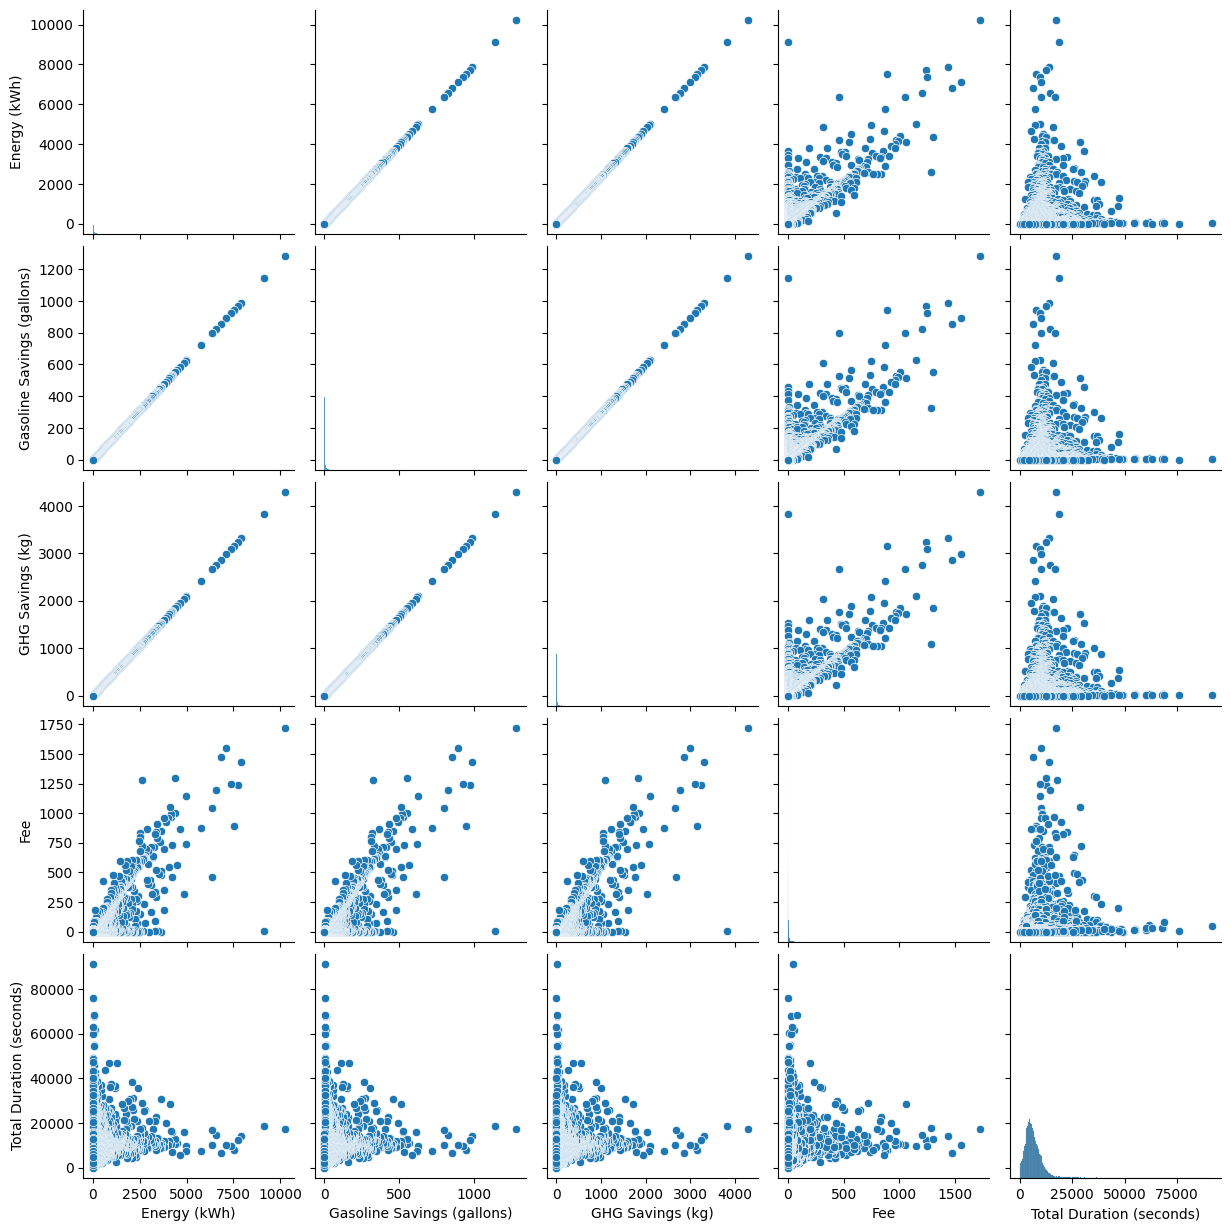

In [18]:
result_sorted['Total Duration (seconds)'] = result_sorted['Total Duration (hh:mm:ss)'].dt.total_seconds()

# Create the pairplot
sns.pairplot(result_sorted)
plt.show()

The analysis reveals a power law relationship between total charging duration and energy consumption, with larger EV batteries generally requiring more energy. However, outliers exist where extended charging durations are observed despite minimal energy usage, typically attributable to instances where vehicles remain plugged in despite already being fully charged. Identifying and addressing these outliers can enhance the efficiency of charging infrastructure and ensure optimal utilization, ultimately refining our understanding of EV charging behaviors and improving the effectiveness of charging networks.

Next part is the obvious linear relationship GHG savings/gasoline savings, when looking at the data to get one from another just divide by 7.89. However, an interesting is the behaviours of fees. 
It acts as a linear relationship; however, it is unclear what is going on. Hence, we decided to delve deeper into this data. Below, we utilize average fee, energy spent, and charging time to understand the trend.

In [95]:
# Ensure 'Start Date' is in datetime format and set it as the index
#data_cleaned['Start Date'] = pd.to_datetime(data_cleaned['Start Date'])
#data_cleaned.set_index('Start Date', inplace=True)
from bokeh.layouts import row
from bokeh.models import Spacer

# Create a boolean mask for dates starting from August 2017
mask = (data_cleaned.index >= '2017-08-01')

# Apply the mask to the DataFrame and resample each column by day
daily_fee = data_cleaned.loc[mask, 'Fee'].resample('D').mean()
daily_energy = data_cleaned.loc[mask, 'Energy (kWh)'].resample('D').mean()
daily_time = data_cleaned.loc[mask, 'Charging Time (minutes)'].resample('D').mean()

w,h = 400,300

p1 = figure(x_axis_type="datetime", title='Average Fee (Daily)', 
           x_axis_label='Day', y_axis_label='Average Fee', width=w, height=h)
p2 = figure(x_axis_type="datetime", title='Average Energy Spent (Daily)', 
           x_axis_label='Day', y_axis_label='Average Energy (kWh)', width=w, height=h)
p3 = figure(x_axis_type="datetime", title='Average Charging Time (Daily)', 
           x_axis_label='Day', y_axis_label='Average Time', width=w, height=h)

# Add vbar glyphs for the bar plots
p1.vbar(x=daily_fee.index, top=daily_fee.values, width=0.5, color="blue")
p2.vbar(x=daily_energy.index, top=daily_energy.values, width=0.5, color="green")
p3.vbar(x=daily_time.index, top=daily_time.values, width=0.5, color="red")

# Set the y-axis limits
p1.y_range = Range1d(0, 8)
p2.y_range = Range1d(0, 25)
p3.y_range = Range1d(0, 250)

# Arrange the first two plots in a row
row_layout = row(p1, p2)

# Create spacers
spacer1 = Spacer(width=200)
spacer2 = Spacer(width=200)

# Arrange the spacers and the third plot in a row
row_layout2 = row(spacer1, p3, spacer2)

# Arrange the two rows in a column
column_layout = column(row_layout, row_layout2)

# Display the plot
output_notebook()
show(column_layout)

Loading BokehJS ...

Since 2017 until 2021, the average fee per day has been increasing. The average energy spent per day has been increasing as well, with a slight drops in in 2020 possibly due to lack of deman because of COVID. The average charging time per day has been also increasing since 2017. This phenomenon could be attributed to various factors, including the increasing adoption of EVs leading to greater demand for charging infrastructure, which may result in higher fees as providers seek to balance supply and demand. Additionally, the rise in average energy consumption because of large-scale training of AI models, and charging duration could reflect the growing popularity of larger battery-capacity EVs. 

#### ML prediction for fee


In [24]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

data_ml = data_cleaned[['Energy (kWh)', 'Charging Time (minutes)', 'Fee']].dropna()

# features and the target
X = data_ml[['Energy (kWh)', 'Charging Time (minutes)']]
y = data_ml['Fee']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = KNeighborsRegressor(n_neighbors=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

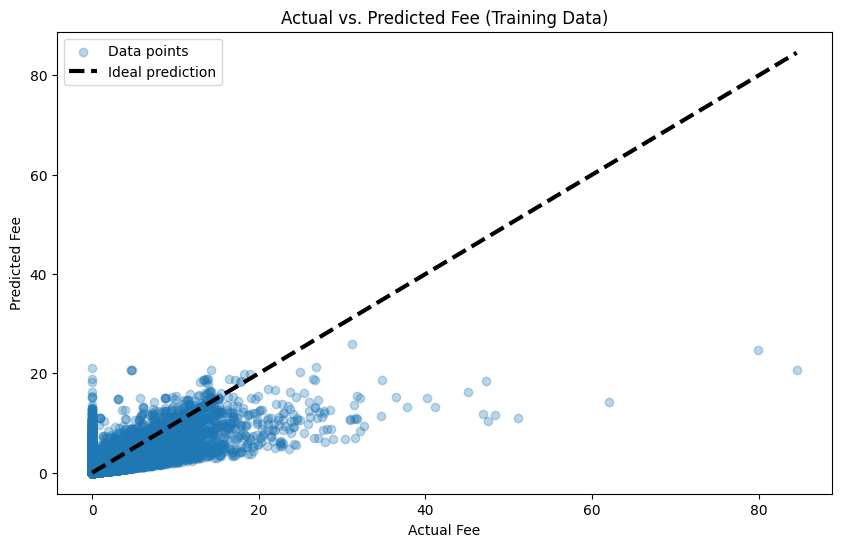

In [26]:
import matplotlib.pyplot as plt

y_train_pred = model.predict(X_train)

# Create a scatter plot of the actual vs. predicted 'Fee' for the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.3, label='Data points')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=3, label='Ideal prediction')
plt.title('Actual vs. Predicted Fee (Training Data)')
plt.xlabel('Actual Fee')  # Add x-axis label
plt.ylabel('Predicted Fee')  # Add y-axis label
plt.legend()  # Add a legend
plt.show()

By employing a simple machine learning model, a K-Nearest Neighbors regressor, we aimed to uncover underlying patterns within the charging fee data. Using energy consumption and charging duration as input features and the fee as the target variable, the model revealed a linear trend, similarly the individual subcategories. This suggests a robust relationship between energy usage, charging time, and the associated fees, furthering the importance of these factors in shaping charging behavior and pricing dynamics within the EV ecosystem. 

## 6. Discussion

## 7. Contributions

| Section       | Andro | Matija | Lucian |
|---------------|----------|----------|----------|
| Motivation  |          |          |          |
| Basic Stats |      |          |          |
| Data Analysis   |          |          |          |
| Genre   |     100%     |    0%      |     0%     |
| Visualizations       |          |          |          |
| Discussion    |     0%     |    100%      |    0%      |